In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

# Change the plot size.
plt.rcParams['figure.figsize'] = [18.0, 12.0]

In [42]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [4]:
# import my Finance Analysis Tools (fat)
import finance as fat

In [5]:
data = fat.get_price_data('IAU')

Loaded data for IAU: 2005-01-28 to 2018-02-16.


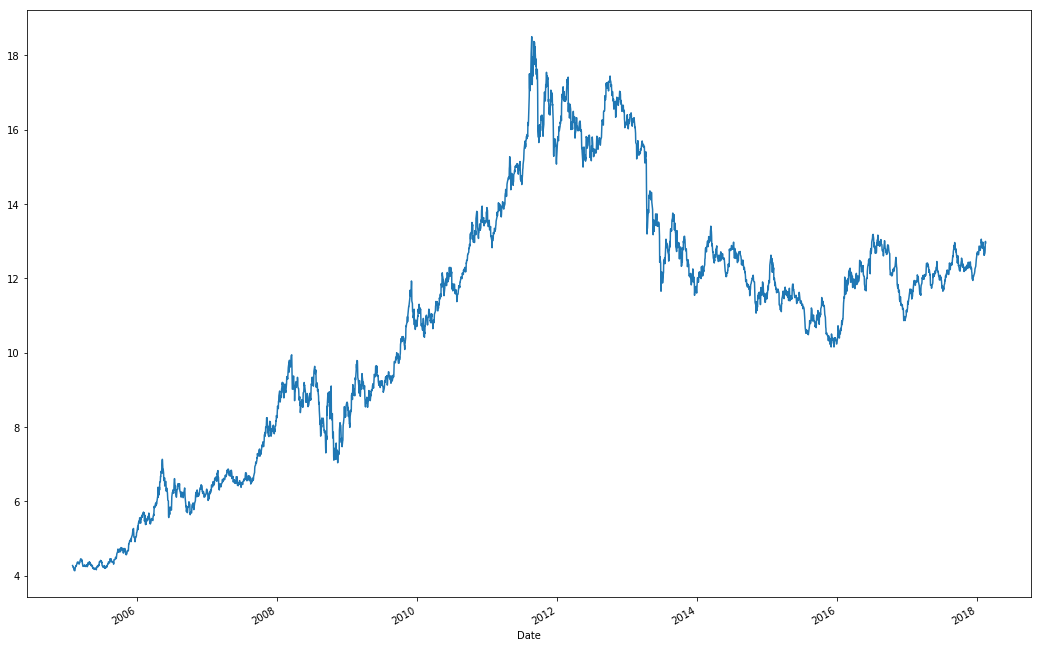

In [9]:
data['Adj Close'].plot()

In [35]:
predict = pd.read_csv("data/gold-test/sub.csv", header=None, names = ['Date','Predict'])
predict['Date'] = pd.to_datetime(predict['Date'])
predict = predict.set_index('Date')
predict = predict.shift(1)

In [36]:
predict['Actual'] = data['Adj Close']

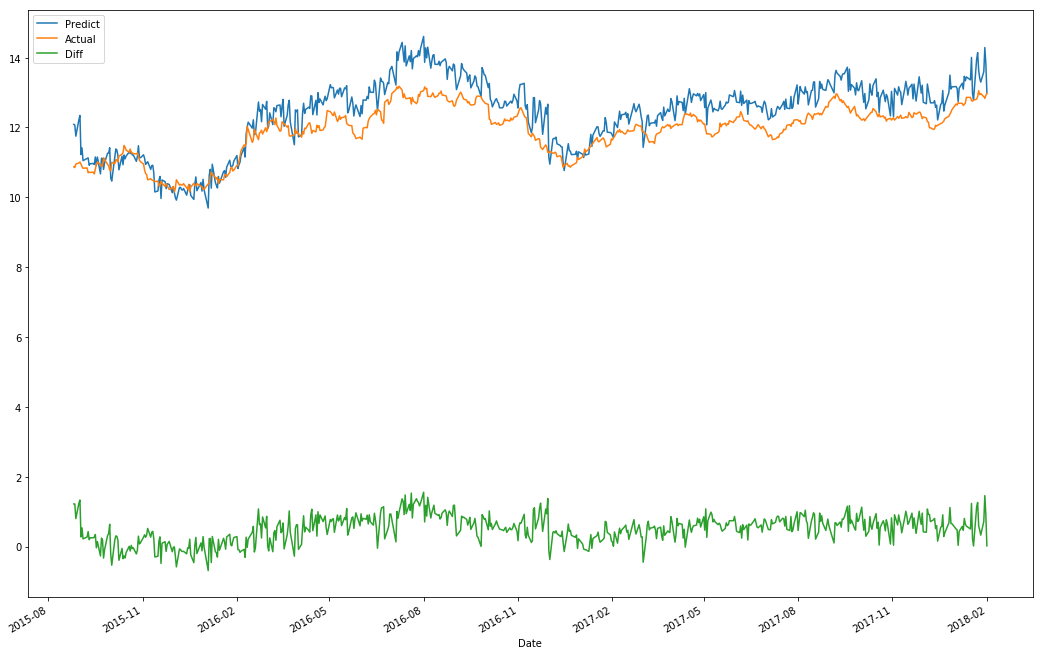

In [50]:
predict = predict.dropna()
predict.plot()

In [62]:
rmse = np.sqrt(mean_squared_error(predict['Predict'], predict['Actual']))
rmspe = rmse / len(predict)
#ex_rmspe = np.(rmspe)
print(f'RMSE = {rmse}')
print(f'RMSPE = {rmspe}')
#print(f'exp RMSPE = {ex_rmspe}')

RMSE = 0.6440618823689434
RMSPE = 0.0010489607204705919


In [38]:
predict['Diff'] = predict['Predict'] - predict['Actual'] 

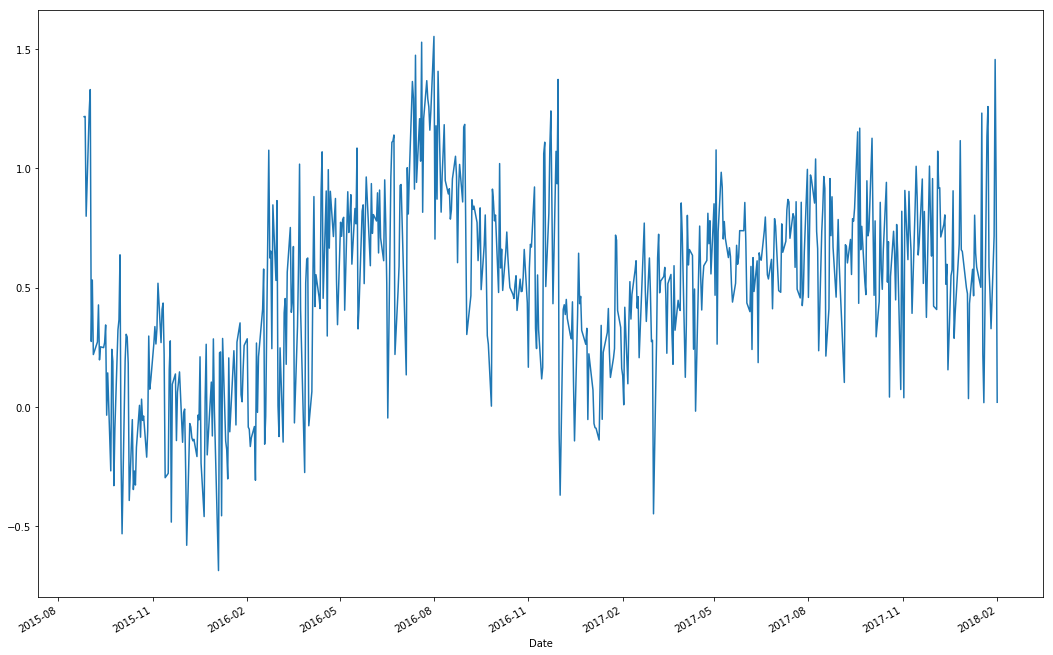

In [39]:
predict['Diff'].plot()

In [40]:
predict.head()

,Predict,Actual,Diff
Date,,,
2015-08-25,NaN,11.02,NaN
2015-08-26,12.087594,10.87,1.217594
2015-08-27,12.068537,10.85,1.218537
2015-08-28,11.749315,10.95,0.799315
2015-08-31,12.222389,10.98,1.242389


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-12,12.66,12.74,12.66,12.68,12.68,11623200
2018-02-13,12.74,12.77,12.70,12.76,12.76,8174100
2018-02-14,12.80,13.02,12.78,12.98,12.98,19514800
2018-02-15,13.01,13.02,12.95,12.99,12.99,13914600
2018-02-16,12.98,13.03,12.92,12.95,12.95,13611800


In [7]:
#sma_data = fat.get_sma_df(data, 'Adj Close')

In [8]:
#sma_data.tail()

In [9]:
sma_pct_diff = fat.get_sma_pct_diff_df(data, 'Adj Close')

In [10]:
sma_pct_diff.tail()

,Adj Close,pct diff Adj Close SMA3,pct diff Adj Close SMA5,pct diff Adj Close SMA10,pct diff Adj Close SMA20,pct diff Adj Close SMA50,pct diff Adj Close SMA100,pct diff Adj Close SMA200
Date,,,,,,,,
2018-02-12,12.68,0.210748,0.205469,-0.658101,-1.065033,1.243992,2.020291,3.064293
2018-02-13,12.76,0.551615,0.726239,0.023517,-0.401983,1.799847,2.642481,3.691364
2018-02-14,12.98,1.353462,1.883830,1.700227,1.232257,3.442780,4.364326,5.441016
2018-02-15,12.99,0.619675,1.420987,1.762632,1.215521,3.403808,4.401080,5.484119
2018-02-16,12.95,-0.179856,0.605966,1.330203,0.837064,2.957545,4.050330,5.115343


In [11]:
del sma_pct_diff['Adj Close']
data = data.join(sma_pct_diff, how='outer')

In [12]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,pct diff Adj Close SMA3,pct diff Adj Close SMA5,pct diff Adj Close SMA10,pct diff Adj Close SMA20,pct diff Adj Close SMA50,pct diff Adj Close SMA100,pct diff Adj Close SMA200
Date,,,,,,,,,,,,,
2018-02-12,12.66,12.74,12.66,12.68,12.68,11623200,0.210748,0.205469,-0.658101,-1.065033,1.243992,2.020291,3.064293
2018-02-13,12.74,12.77,12.70,12.76,12.76,8174100,0.551615,0.726239,0.023517,-0.401983,1.799847,2.642481,3.691364
2018-02-14,12.80,13.02,12.78,12.98,12.98,19514800,1.353462,1.883830,1.700227,1.232257,3.442780,4.364326,5.441016
2018-02-15,13.01,13.02,12.95,12.99,12.99,13914600,0.619675,1.420987,1.762632,1.215521,3.403808,4.401080,5.484119
2018-02-16,12.98,13.03,12.92,12.95,12.95,13611800,-0.179856,0.605966,1.330203,0.837064,2.957545,4.050330,5.115343


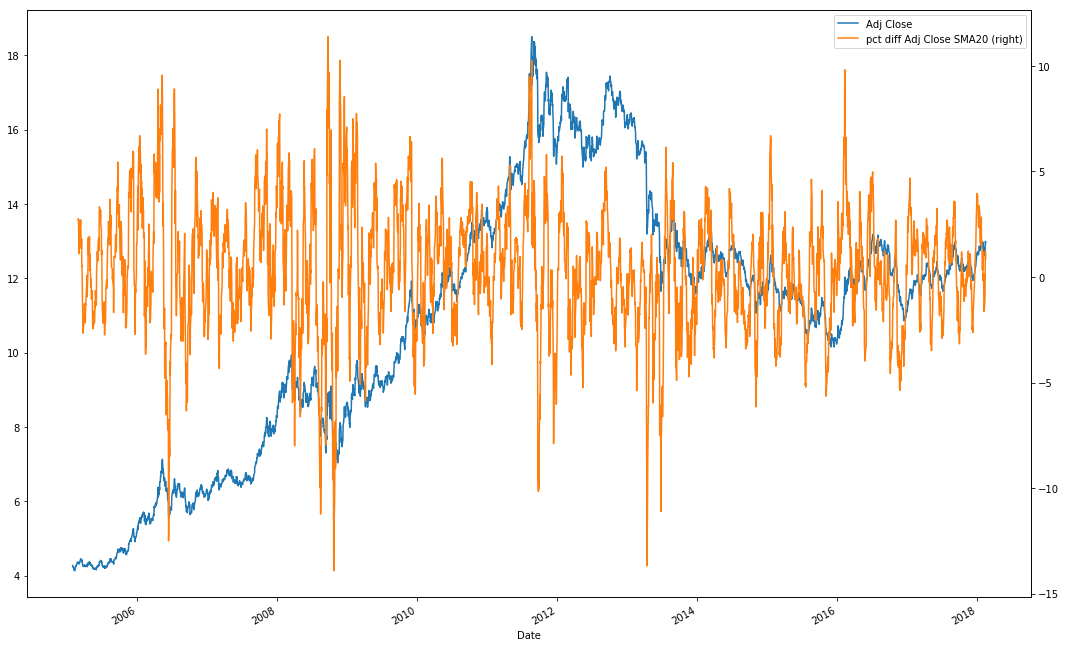

In [13]:
plot_data = data[['Adj Close', 'pct diff Adj Close SMA20']]#, '%diff Adj Close SMA200']]
plot_data.plot(secondary_y = ['pct diff Adj Close SMA20'])#, '%diff Adj Close SMA20'])

In [ ]:
search = "gold price usd"


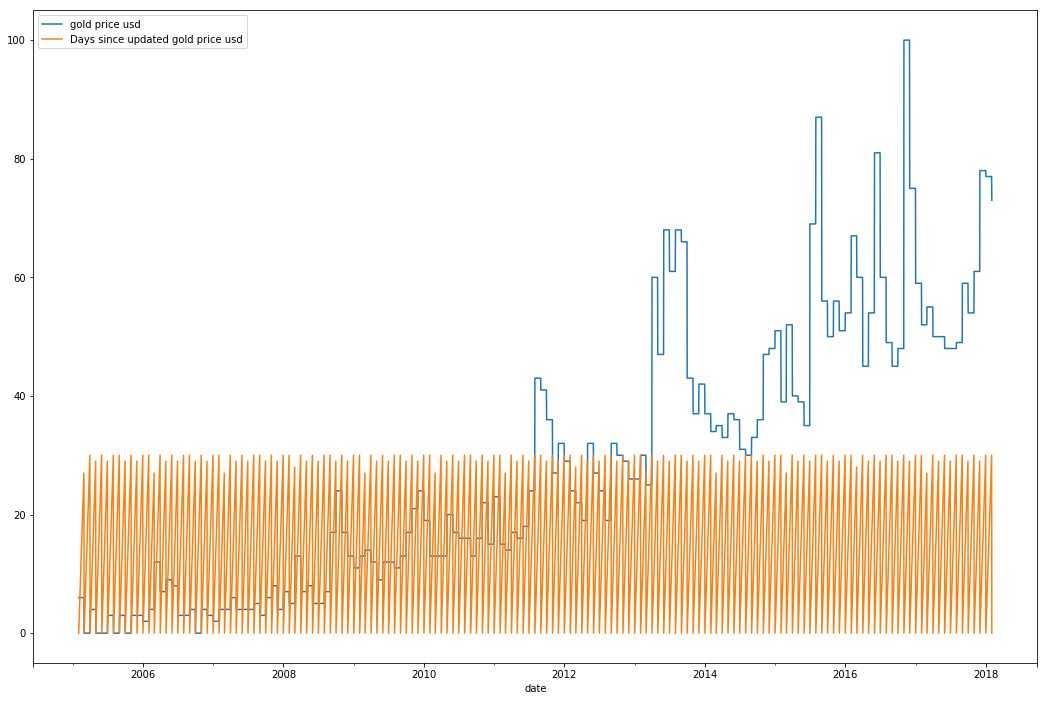

In [22]:
trends = fat.get_google_trends_df(data, search)
trends.plot()

In [16]:
#trends, related_queries = fat.get_google_trends(data, search)
trends_sma_pct_diff = fat.get_google_trends_sma_pct_diff_df(data, search, [50,100,200])

In [17]:
trends_sma_pct_diff.tail()

,pct diff gold price usd SMA50,pct diff gold price usd SMA100,pct diff gold price usd SMA200
date,,,
2018-01-28,-0.568182,10.031438,25.417379
2018-01-29,-0.542495,9.670987,25.121872
2018-01-30,-0.516796,9.312890,24.827754
2018-01-31,-0.491083,8.957125,24.535015
2018-02-01,-5.538302,3.020040,17.827455


In [18]:
data = data.join(trends_sma_pct_diff, how='outer')

In [19]:
data[-14:]

,Open,High,Low,Close,Adj Close,Volume,pct diff Adj Close SMA3,pct diff Adj Close SMA5,pct diff Adj Close SMA10,pct diff Adj Close SMA20,pct diff Adj Close SMA50,pct diff Adj Close SMA100,pct diff Adj Close SMA200,pct diff gold price usd SMA50,pct diff gold price usd SMA100,pct diff gold price usd SMA200
2018-01-30,12.94,12.95,12.83,12.83,12.83,9532200.0,-0.491210,-0.804082,-0.279807,0.328433,3.015802,3.227156,4.461389,-0.516796,9.312890,24.827754
2018-01-31,12.90,12.94,12.79,12.92,12.92,20848500.0,0.336526,0.092966,0.302772,0.933557,3.633593,3.954620,5.169761,-0.491083,8.957125,24.535015
2018-02-01,12.88,12.97,12.86,12.97,12.97,13352000.0,0.490702,0.433638,0.519259,1.193727,3.944606,4.355242,5.552707,-5.538302,3.020040,17.827455
2018-02-02,12.84,12.84,12.75,12.80,12.80,15380700.0,-0.749548,-0.621118,-0.813638,-0.167687,2.496757,2.984126,4.148444,NaN,NaN,NaN
2018-02-05,12.84,12.89,12.80,12.85,12.85,18014000.0,-0.181253,-0.186422,-0.457045,0.159788,2.806580,3.382249,4.533160,NaN,NaN,NaN
2018-02-06,12.81,12.82,12.67,12.69,12.69,19535100.0,-0.704225,-1.214386,-1.551590,-1.087338,1.482654,2.096642,3.218145,NaN,NaN,NaN
2018-02-07,12.69,12.73,12.59,12.62,12.62,11388300.0,-0.786164,-1.298295,-1.766949,-1.629122,0.884135,1.544899,2.635003,NaN,NaN,NaN
2018-02-08,12.65,12.70,12.60,12.65,12.65,12123600.0,-0.026344,-0.565949,-1.310657,-1.391433,1.090014,1.790384,2.858490,NaN,NaN,NaN
2018-02-09,12.62,12.67,12.59,12.63,12.63,11514000.0,-0.026385,-0.457125,-1.204631,-1.524307,0.897936,1.624544,2.678753,NaN,NaN,NaN
2018-02-12,12.66,12.74,12.66,12.68,12.68,11623200.0,0.210748,0.205469,-0.658101,-1.065033,1.243992,2.020291,3.064293,NaN,NaN,NaN


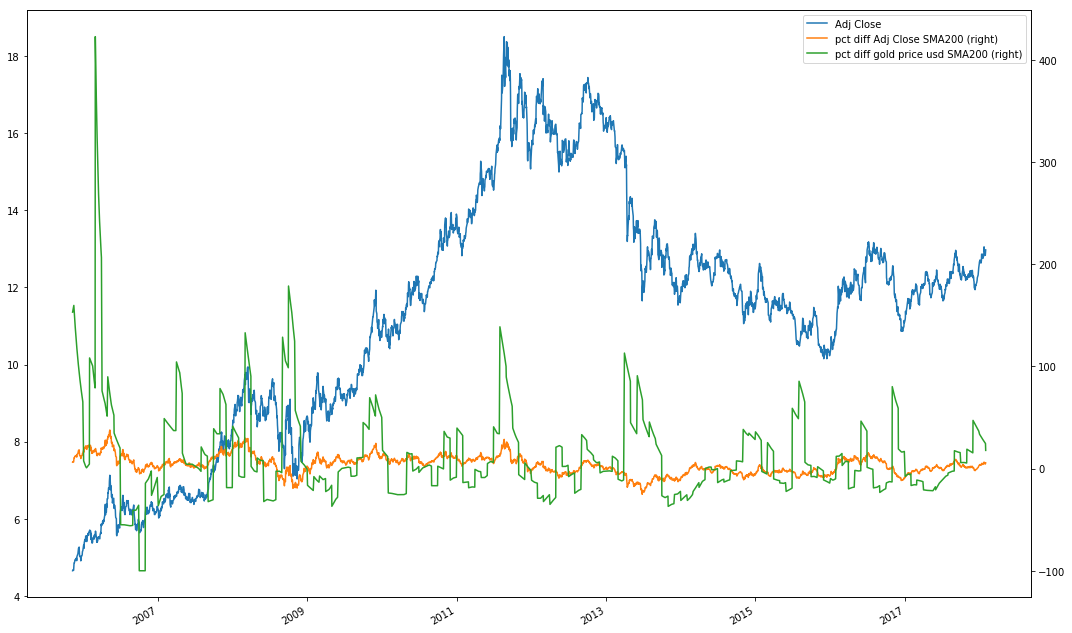

In [20]:
plot_data = data[['Adj Close', 'pct diff Adj Close SMA200','pct diff gold price usd SMA200']].dropna()
plot_data.plot(secondary_y = ['pct diff Adj Close SMA200','pct diff gold price usd SMA200'])

In [ ]:
trends.plot()

In [ ]:
trends.tail()